In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

%matplotlib inline

In [7]:
raw_data = pd.read_json('food_enforcement_US_bacteria.json', orient='records')

In [8]:
print(raw_data.shape)
print(raw_data.head(10).product_description)

(6104, 26)
0    Native Catch Salmon Bacon, Traditional flavor....
1    Delish Fruit Burst 10 oz.(283 g)  Enjoy by: 8/...
2    Garden Pure Holiday Fruit Bowl 4 lbs (1.81kg) ...
3    Fresh Fruit Product is labeled in part:  "***F...
4    Ready Pac¿ Gourmet Fruit Bowl, 64oz , UPC 7774...
5    River Ranch brand Diced Grn Cabbage w/Color, 4...
6    Sweet and Sour Stir Fry packaged under the fol...
7    Onion Slab Cut.  Products are labeled in part:...
8    MIX w/yellow onions used as an ingredient.  Pr...
9    Fresh n Easy brand Shred Grn Cabbage w/Color, ...
Name: product_description, dtype: object


### Bag of words feature representation for descriptive text

In [9]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer()

corpus = raw_data['product_description']
X = vectorizer.fit_transform(corpus)
X.shape

(6104, 13767)

### Silhouette plot - range_n_clusters = [15, 25, 70]

For n_clusters = 15 The average silhouette_score is : 0.1421275641388048
For n_clusters = 25 The average silhouette_score is : 0.10501046612341311
For n_clusters = 70 The average silhouette_score is : 0.011540986137782077


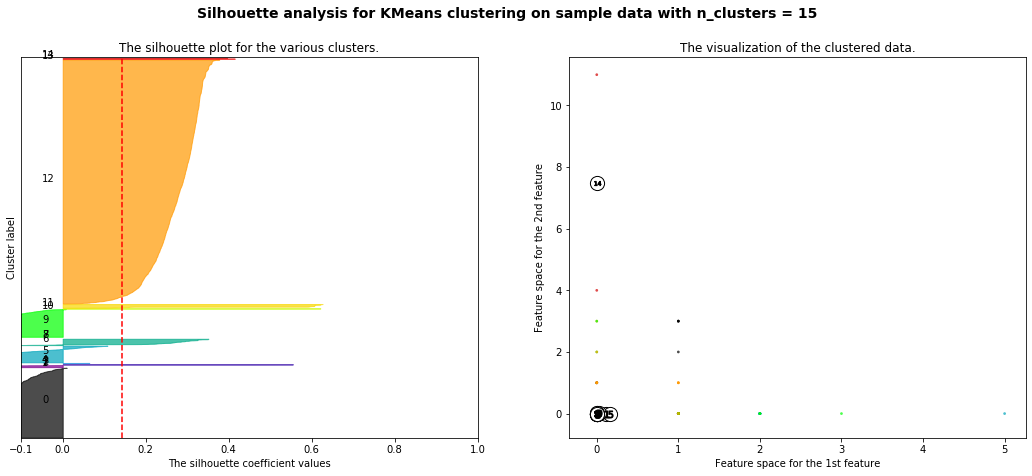

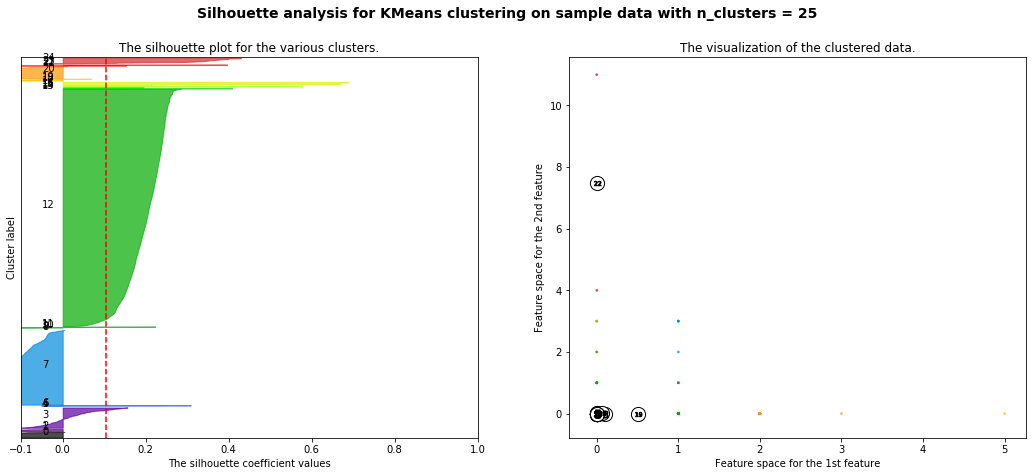

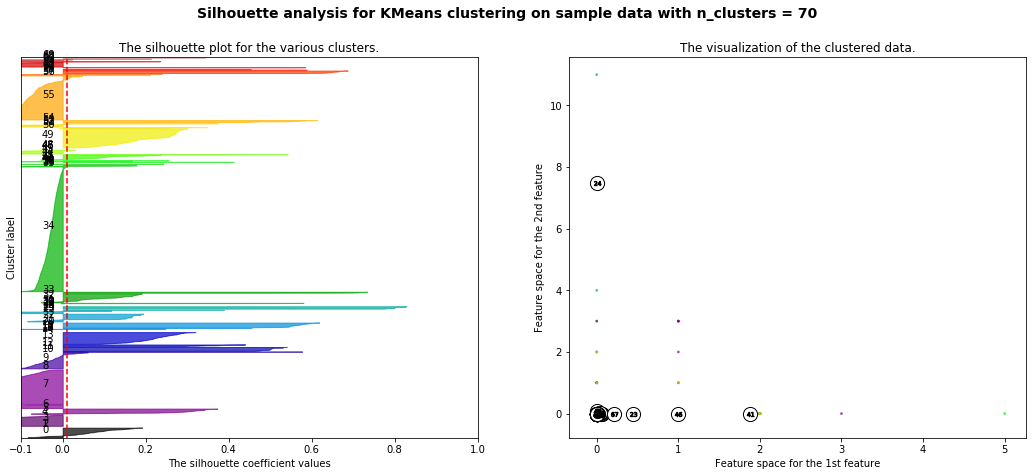

In [10]:
# example: https://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_silhouette_analysis.html
range_n_clusters = [15, 25, 70] #[2, 3, 4, 5, 6]

for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, X.shape[0] + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(X)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(X, cluster_labels)
    print(
        "For n_clusters =",
        n_clusters,
        "The average silhouette_score is :",
        silhouette_avg,
    )

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(
            np.arange(y_lower, y_upper),
            0,
            ith_cluster_silhouette_values,
            facecolor=color,
            edgecolor=color,
            alpha=0.7,
        )

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    
    ax2.scatter(
        X[:, 0].toarray(), X[:, 1].toarray(), marker=".", s=30, lw=0, alpha=0.7, c=colors, edgecolor="k"
    )

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(
        centers[:, 0],
        centers[:, 1],
        marker="o",
        c="white",
        alpha=1,
        s=200,
        edgecolor="k",
    )

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker="$%d$" % i, alpha=1, s=50, edgecolor="k")

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(
        "Silhouette analysis for KMeans clustering on sample data with n_clusters = %d"
        % n_clusters,
        fontsize=14,
        fontweight="bold",
    )

plt.show()

### Silhouette plot - range_n_clusters = [50, 75, 100]

For n_clusters = 50 The average silhouette_score is : 0.07447721575807355
For n_clusters = 75 The average silhouette_score is : 0.015313694730653249
For n_clusters = 100 The average silhouette_score is : 0.01825710172532984


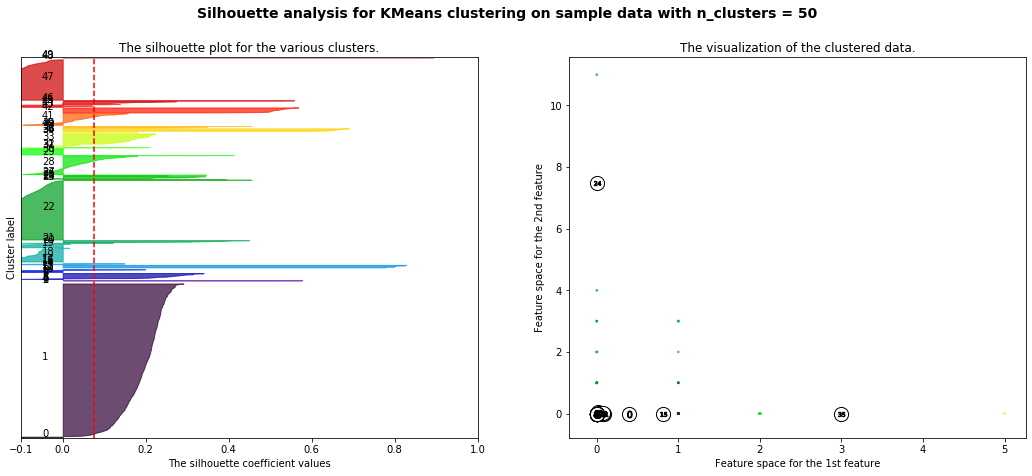

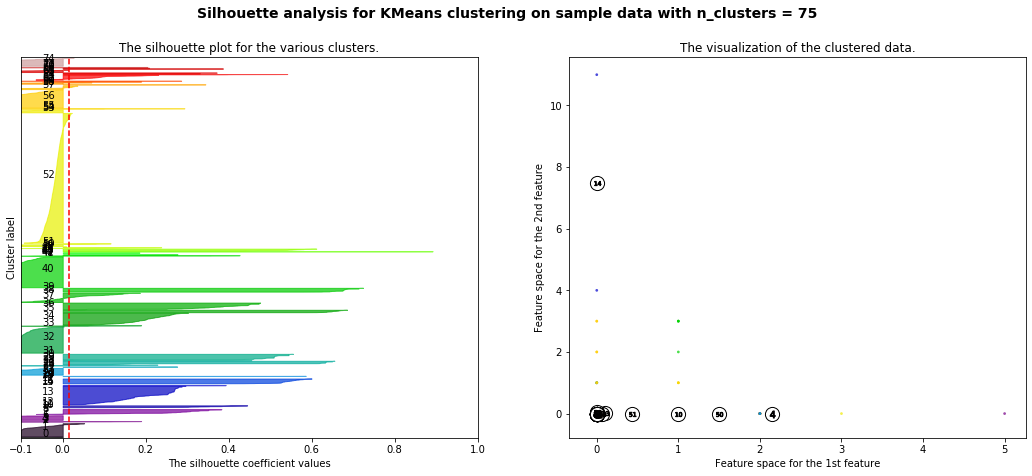

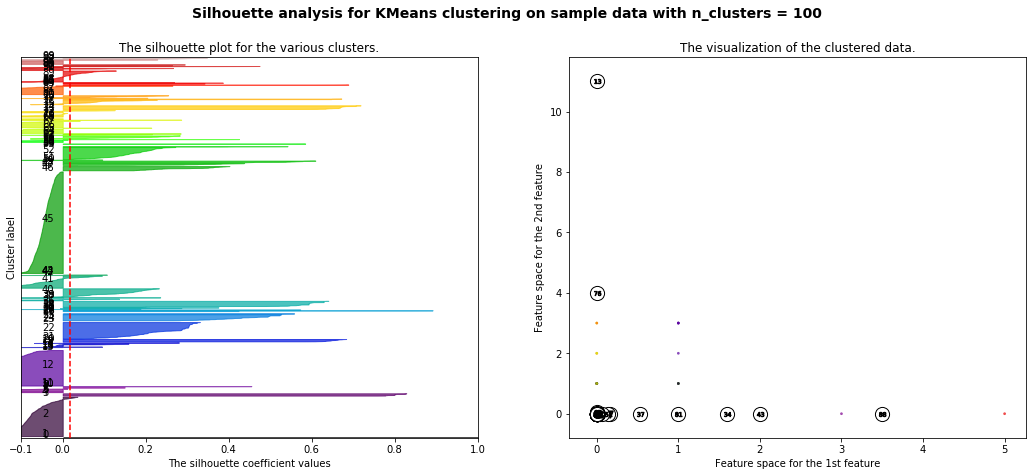

In [11]:
# example: https://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_silhouette_analysis.html
range_n_clusters = [50, 75, 100] #[2, 3, 4, 5, 6]

for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, X.shape[0] + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(X)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(X, cluster_labels)
    print(
        "For n_clusters =",
        n_clusters,
        "The average silhouette_score is :",
        silhouette_avg,
    )

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(
            np.arange(y_lower, y_upper),
            0,
            ith_cluster_silhouette_values,
            facecolor=color,
            edgecolor=color,
            alpha=0.7,
        )

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    
    ax2.scatter(
        X[:, 0].toarray(), X[:, 1].toarray(), marker=".", s=30, lw=0, alpha=0.7, c=colors, edgecolor="k"
    )

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(
        centers[:, 0],
        centers[:, 1],
        marker="o",
        c="white",
        alpha=1,
        s=200,
        edgecolor="k",
    )

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker="$%d$" % i, alpha=1, s=50, edgecolor="k")

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(
        "Silhouette analysis for KMeans clustering on sample data with n_clusters = %d"
        % n_clusters,
        fontsize=14,
        fontweight="bold",
    )

plt.show()

### fit Kmeans

In [12]:
N_clusters = 50

In [13]:
#fit Kmeans with k clusters
km = KMeans(n_clusters=N_clusters,n_init=30)
km.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=50, n_init=30, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [14]:
#fit Kmeans with k clusters
corpus2 = raw_data['reason_for_recall']
y = vectorizer.fit_transform(corpus2)
km2 = KMeans(n_clusters=N_clusters,n_init=60)
km2.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=50, n_init=60, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

### labels are named with integers and stored in the `labels_` attribute

In [15]:
km.labels_

array([22, 13, 13, ..., 13, 14, 14], dtype=int32)

In [16]:
km2.labels_

array([35, 17, 17, ..., 17,  7, 16], dtype=int32)

In [17]:
print(len(km.labels_))

6104


In [18]:
print(len(km2.labels_))

6104


In [40]:
# get unique cluster labels
clusterList = km.labels_
cluster_names_set = set(clusterList)
print(cluster_names_set)

{0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49}


In [62]:
clusterList2 = km2.labels_
cluster_names_set2 = set(clusterList2)
print(cluster_names_set2)

{0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49}


In [60]:
for c in cluster_names_set:
    print('-' * 50)
    print('cluster', c)
    print('-' * 50)
    for i in range(0,len(km.labels_)):
        if km.labels_[i] == c:
            print(raw_data['product_description'][i], c)
            print('**********')


--------------------------------------------------
cluster 0
--------------------------------------------------
Black Current Italian Ice  Product can be packaged in 2.5 gallon or 1.5 gallon plastic tubs or cardboard quart container.  Firm is unable to determine how batches were packaged. 0
**********
Chocolate Chip Ice Cream.    Product can be packaged in 2.5 gallon or 1.5 gallon plastic tubs or cardboard quart container.  Firm is unable to determine how batches were packaged. 0
**********
Ginger Ice Cream  Product can be packaged in 2.5 gallon or 1.5 gallon plastic tubs or cardboard quart container.  Firm is unable to determine how batches were packaged. 0
**********
Truffle Mint Ice Cream.    Product can be packaged in 2.5 gallon or 1.5 gallon plastic tubs or cardboard quart container.  Firm is unable to determine how batches were packaged. 0
**********
Mango Italian Ice Product can be packaged in 2.5 gallon or 1.5 gallon plastic tubs or cardboard quart container.  Firm is unable to

Fresh Select Brussels Sprouts, 6x8oz, 9x12oz.  Item # 22986, 22707, UPC 0 11110 91610  5, 7 09351 32222 8. 13
**********
McDonalds M Diced Apples Net Wt. 0.02 oz (26g)  On or before August 19; no upc code   13
**********
Wegmans Apples, Cheese & Caramel Dip, 4 OZ  (113g) Distributed by: Wegmans Foods Markets, Inc. Rochester, NY 14603  On or before August 15; UPC 7789026743   13
**********
McDonalds M Apple Slices Net Wt 1.2 oz (34g)  On or before August 19; no upc code   13
**********
Wawa apple caramel dipper Net Wt 6.7 OZ (191g) Distributed by: Wawa, Inc. Wawa, PA 19063 wawa.com  On or before August 16; UPC 261900394   13
**********
Finest Traditions Homemade-Style Cole Slaw, 8 lbs., 10 733147 10170 1;      Finest Traditions Homemade Style Cole Slaw, 16 oz., 7 33147 00025 0;       13
**********
Ready Pac fruit frenzy Net Wt. 32 OZ (2 LB) 907 g  Distributed by Ready Pac Foods, Inc. Irwindale, CA 91706 USA 1-800-800-782  www.readypac.com  On or before August 18; UPC 7774523086   13
***

Famous Thick Salsa packaged in 7 oz clear plastic containers, manufactured by Sartori Inspirations, LLC, Lafayette, CO 80026. 13
**********
Wawa pineapples, strawberries & mango  Net. Wt. 9 oz. rigid plastic tray   Distributed by: Wawa, Inc. Wawa, PA 19063 UPC 726191061155 13
**********
Sunland Valencia Roasted & Salted Peanuts, 2lb UPC 0-48687-12105-2. 13
**********
Sunland Raw Virginia Reg Jumbo InShell, 50 lb UPC 0-48687-76101-2   13
**********
Sunland Salted and Roasted Valencia Peanuts, 1 lb, UPC 48687122066. 13
**********
Belfonte Mama's Choice Premium Ice Cream, Reverse Peanut Butter Pie, Peanut Butter Coated Fudge Filled Cups, Peanut Butter Flakes and Swirled Chocolate Cookie Pie Crust Ribbon in Peanut Butter Ice Cream, 56 oz. (1.66L) Belonite Ice Cream Company, Kansas City, MO 13
**********
Nutrition bar. Crunch¿ thinkThin Brand, Mixed Nuts, 40 grams. Packaged in plastic, labeled as:"Distributed by thinkproducts***Ventura, CA 93003***".    10 bars/carton, 12 cartons/case. 120 

**********
Dairy Fresh,	Homemade Potato Salad,	2/5 lb.,		0 70163 56575 3,	12/6/2013;   13
**********
Spoon River,	Pimento Cheese Spread,	1/5 lb.,		0 11596 55678 9,	12/23/2013;   13
**********
Broccoli Crunch Kit PP 92051229, SAFEWAY ITEM#, 1/7#, 59001, DISTRIBUTED BY LUCERNE FOODS, INC, PO BOX 99, PLEASANTON, CA 94566-0009, 1-877-232-4271 13
**********
Pasta Mexican Formula PA.129, packaged under these labels:  7-11 Fresh to Go Mexican Pasta Salad in 12/7 oz containers. Distributed by 7-Eleven Inc. Dallas, TX. 13
**********
PRIESTER'S PECANS brand NUTTY FAVORITES ASST, Stock No. 79, Net Wt 1 lb 10 oz (737g) 13
**********
Diced Summer Slaw Salad Kit  Fresh Food Manufacturing Company  10.5 lbs 13
**********
Garden-Fresh Lite Italian Pasta Salad , Product Code 0 11596 55208 8,	1/5 lb   13
**********
Archer Farms Neptune Salad,  0 85239 20242 5,	6/6 oz  Archer Farms Neptune Salad,  0 85239 20243 2,	6/14 oz       13
**********
Garden-Fresh Dixie Style Cole Slaw, Product Code 0 11596 93007 7

Fried Bologna & Egg on Bun, Net Wt. 5.40 oz., UPC 7-01248-00804-8, MFG Code 652 13
**********
Buffalo Chicken Salad on 100% Whole Wheat Roll, Net. Wt. 5.50 oz., UPC 7-01248-01061-4, MFG Code 1775 13
**********
Barbecue Beef, Net Wt. 4.30 oz., UPC 7-01248-00176-6, MFG Code 294 13
**********
Blue Bell Ice Cream Blueberry Cheesecake Still a 1/2 Gal (2 QTS) 13
**********
Blue Bell Mint Cookies 'n Cream One Pint (473 mL) 13
**********
Blue Bell Ice Cream Krazy Kookie Dough 3 Gallon 13
**********
Blue Bell Ice Cream Mango 3 Gallon 13
**********
Blue Bell Ice Cream Homemade in the Shade Still a 1/2 Gal (2 QTS) 13
**********
Blue Bell Ice Cream Chocolate Chip Cookie Dough 3 Gallon 13
**********
Blue Bell Buttered Pecan One Pint (473 mL) 13
**********
Celery with Peanut Butter, Net Wt. 2.50 oz. UPC 7-01248-01071-3, MFG Code 1786 13
**********
Pancake w/Sausage, Net Wt. 4.50 oz., UPC 7-01248-00628-1, MFG Code 1528  13
**********
Blazing Sausage Dog, Net Wt. 5.50 oz., UPC 7-01248-01065-2, MFG Cod

JALAPE¿O ALBACORE TUNA , sold under brand The Garibaldi Cannery, metal can, net weight 8 oz. (227 gram).  No UPC 13
**********
Buttermilk, Passion Fruit Frozen Yogurt Bucket, 340, Jeni's Splendid Ice Creams, LLC, 3 gallons, plastic bucket, individually packed, frozen. 13
**********
Mini Chocolate Truffle Sandwich Sleeve, Jeni's Splendid Ice Creams, LLC, mini Sandwich, paper box, 7 sandwiches per sleeve, frozen. 13
**********
Smoked Chocolate Bucket, Jeni's Splendid Ice Creams, LLC, 3 gallons, plastic bucket, individually packed, frozen. 13
**********
Pfeffernusse Macaroon Sandwich Case - for scoop shop orders, Jeni's Splendid Ice Creams, LLC, 6oz sandwich, paper box, individually packed, frozen. 13
**********
Blackout Terrine Slice, Jeni's Splendid Ice Creams, LLC, Slice, plastic bag, individually packed, frozen.    Blackout Terrine Slice Case, Jeni's Splendid Ice Creams, LLC, Slice, plastic bag, 12 slices per case, frozen.  13
**********
Green Tomato Buttermilk Frozen Yogurt Buckets, 

**********
Nature's Promise Cranberry Trail Mix Net Wt. 12 oz Distributed by Foodhold USA LLC Landover, MD 20785  Product of USA UPC 688267066122 13
**********
Battered Corn Nugget, Net Wt. 32oz (2lbs) 907g, 6/2lb bags, 4/3lb bags, Product #241120, 241620.    UPC: 10050650024115 13
**********
Walnuts Halves & Pieces Net Wt. 2.5 lbs  Distributed by Woodstock Farms Mfg. Edison, NJ 08817 Product of USA  13
**********
Kelloggs ¿ Eggo ¿  Nutri-Grain¿ Whole Wheat Waffles  12.3 oz (10 ct) retail carton  8, 12.3 oz retail cartons per case 13
**********
OSSIE'S WASABI HERRING, NET WT. 7 OZ., UPC 739885109088; -- Far Rockaway, NY 11691 --- The product is packed in a plastic deli tub. 13
**********
UPC 1373312032,  Meijer White Choc Chip Pretzel Bars, Best By/Date Code:  DEC 09 16. 13
**********
Ultra-Soy Imitation Bacon Flavored Chiplets-B100, packaged in a 25lb box, most responsible firm name on label is CHS Inc. Hutchinson, KS 67501 1-800-835-5006 13
**********
UPC 041498114749,	Southern Grov

Kustard Kwik Mix  50 Lb. Paper Bags 13
**********
Dutchland Homestead Farmer's Cheese, Net Weight 8 oz., Handcrafted & Distributed by: Cumberland Valley Creamery, Mechanicsburg, PA 17055 13
**********
Lipari Old Tyme Colby Longhorn, 2/15# 13
**********
Ruth's Lite Pimento Spread, 12 oz. (UPC 74952-12000), Packed By: B & H Foods, 181 Saluda ST, Chester, SC 29706, packed in plastic containers. 13
**********
Feta, unlabeled, Manufactured for repack and relabel cheeses. 13
**********
Thortons Italian & Provolone 12 oz.  13
**********
Marketside Grab and Go Colby Jack 10.8 oz Set Ups  13
**********
Colored Trim For Sale 13
**********
Marketside Grab and Go Col. Sharp Cheddar 10.8 oz Set Ups  13
**********
artisanal cheese VULTO Creamery HANDMADE CHEESE, Miranda, NET WT. 0.5 lbs,  13
**********
 Best Choice French Vanilla Instant Pudding & Pie Filling, UPC 0 70038 31221 5, Distributed by Associated Wholesale Grocers, INC, 3.4 oz. 13
**********
Butterscotch Drops - MB 1000 [or 4000] Count; NE

Mann's Snacking Favorites Honey Turkey Cheddar, 20.3 oz Tray;  UPC - 716519020483- US 13
**********
BrightFarms Baby Greens Blend (4 oz. and 8 oz. package) 13
**********
Amrita Mango Coconut Energy Bar, 50gm  UPC: 853009004018 13
**********
The Comfy Cow Cow Trax Ice Cream 1 pint 13
**********
The Comfy Cow Double Fold Vanilla Ice Cream 1 pint 13
**********
HEALTH WARRIOR CHIA BAR COCONUT NT WT 25 g (.88 g) ALLERGENS: Contains Tree Nuts (Almonds, Cashews, Coconut) 13
**********
Micheles Toasted Muesli, 16 oz bags, 12 units per case 13
**********
The Comfy Cow Intense Dark Chocolate Ice Cream 1 pint 13
**********
SPRINGFIELD SMOKED FISH PRESLICED Belly Lox / SPRINGFIELD SMOKED FISH ALL NATURAL BELLY (SALTY) LOX,  4oz and sliced sides, UPC: 045049113311 13
**********
SPRINGFIELD SMOKED Whitefish Meat, 5 lb bag, UPC: 045049117111 13
**********
SPRINGFIELD SMOKED FISH Whitefish Salad.   8 oz UPC:  045049117425  5 lb  UPC: 045049117425 13
**********
HEALTH WARRIOR CHIA BAR ACAI BERRY NT WT

**********
Garden-Fresh Gourmet Dill Potato Salad, UPC 0 11596 55137 1, 2/5 lb., Product Code 5137. 10/4/2013  19
**********
Garden-Fresh Broccoli Cheese Salad Base, UPC 0 11596 55136 4, 1/5.25 lb., Product Code 5136. 9/30/2013 - 10/4/2013  19
**********
Our Own Premium Potato Salad, UPC 0 11596 91045 1, 4/5 lb. , Product Code 1045. 9/28/2013-10/5/2013  19
**********
Garden-Fresh Dixie Style Cole Slaw, UPC 0 11596 93007 7, 2/5 lb., Product Code 3007. 9/30/2013 - 10/10/2013  19
**********
Garden-Fresh Country Style Potato Salad, UPC 0 11596 51075 0, 2/5 lb., Product Code 1075. 10/10/2013  19
**********
Old Tyme Sweet Bow Tie Pasta with Bacon, UPC 0 94776 03409 3, 1/5 lb., Product Code 03409. Garden-Fresh Sweet Bow Tie Pasta with Bacon, UPC 0 11 11596 52047 2, 1/5 lb., Product Code 2047. 9/30/2013 - 10/9/2013  19
**********
Garden-Fresh Chopped Broccoli Cauliflower Salad Base, UPC 0 11596 55188 3, 1/5.25 lb., Product Code 5188. 10/1/2013 - 10/14/2013  19
**********
Garden-Fresh,	Tomato W

Serious Food... Silly Prices Peanut Butter, Creamy, Net Wt. 16 oz, UPC 4792100432, Distributed by Newflower Farmers Market Boulder, CO 80301.  Labeling is orange, red, blue, white and yellow with black, orange, white and yellow print writing. 22
**********
Fresh and Easy Organic Creamy Peanut Butter with Sea Salt, 16 oz, packed in plastic jars with a plastic screw on lid, UPC 20003357; labeling is green, blue and white with a photo of a peanut, writing on the label is green white and black.  Produced for Fresh and Easy Neighborhood Market Inc, El Segundo, CA 90245. 22
**********
Archer Farms Creamy Almond Butter, 16 oz, packed in plastic jars with a plastic screw on lid, UPC 8523902334; stick on labeling is red, green, yellow, and maroon with yellow, red, and black print writing.  Distributed by Target Corporation, Minneapolis, MN 55403. 22
**********
Fresh and Easy Creamy Cashew Butter, 16 oz, UPC 51379022525, produced for: Fresh and Easy Neighborhood Market, Inc, El Segundo, CA 80245

Pumpkin Custard (with soy lecithin), sold under Snoqualmie brand.  Product is sold in 1.5 and 3 gallon plastic tubs.  No UPC. 22
**********
Peppermint Stick (without lecithin) Gelato, sold under Snoqualmie brand.  Product is sold in 16 oz (pint) paper cartons.  No UPC. 22
**********
Checkered Chocolate Custard, sold under Snoqualmie brand. Product is sold in 3 gallon plastic tub and 16 oz. (pint) paper cartons.  No UPC. 22
**********
Cherry Sorbet, sold under Snoqualmie brand.  Product is sold in 3 gallon plastic tubs. No UPC. 22
**********
Pear (Bartlett Pear) Sorbet, sold under Snoqualmie brand.  Product is sold in 1.5 and 3 gallon plastic tubs. No UPC. 22
**********
Four Sorbets/Different ones, sold under Snoqualmie brand.  Product is sold in 3 gallon plastic tubs. No UPC. 22
**********
Strawberry Basil Sorbet, sold under Snoqualmie brand.  Product is sold in 1.5 gallon plastic tubs. No UPC. 22
**********
Sorbet Cosmo Lemon Twist, sold under Snoqualmie brand.  Product is sold in 1.5

Ready. Chef. Go! Organic Salmon Fillet;  UPC 233510    Items are made in store with generated scale label; sold as single, packaged items from refrigerated cases in the meat/seafood department or from mobile refrigerated merchandise cases. The scale label denotes the net weight of each product. 22
**********
Ready. Chef. Go! Steelhead Trout Fillet  UPC  234702    Items are made in store with generated scale label; sold as single, packaged items from refrigerated cases in the meat/seafood department or from mobile refrigerated merchandise cases. The scale label denotes the net weight of each product. 22
**********
Ready. Chef. Go!Tuna Loins ;  UPC 235116    Items are made in store with generated scale label; sold as single, packaged items from refrigerated cases in the meat/seafood department or from mobile refrigerated merchandise cases. The scale label denotes the net weight of each product. 22
**********
Yorgos FOODS Lemon Hommus  UPC: 7 56248 10018 6. Product is packaged in a clear 

**********
Publix Midnight Fudge Fantasy cake  Scale ID Number * 002-94254-00000 *The last five digits of the scale ID number contain the unit price. For example $4.99 would have the last five digits ending 00499.  33
**********
Publix 7 inch Dec. Fudge iced w/filling cake  Scale ID Number * 002-19748-00000 *The last five digits of the scale ID number contain the unit price. For example $4.99 would have the last five digits ending 00499.  33
**********
Publix Peanut Butter Fudge Fix cake  Scale ID Number * 002-95628-00000 *The last five digits of the scale ID number contain the unit price. For example $4.99 would have the last five digits ending 00499.  33
**********
Publix Caramel Pecan Crunch cake  Scale ID Number * 002-94301-00000 *The last five digits of the scale ID number contain the unit price. For example $4.99 would have the last five digits ending 00499.  33
**********
Publix 7 inch Chocolate Ganache Grandeur cake  Scale ID Number * 002-94130-00000 *The last five digits of th

A Taste of the East maya brand Cashew Split, packaged and sold in various sizes: (a) Net Wt. 7oz. (198g) UPC 0 20843 23038 9, (b) Net Wt. 14oz. (396g) UPC 0 20843 23071 6, (c) Net Wt. 28oz. (793g) UPC 0 20843 23032 7; (d) NET WT: 5 lbs. (2.25 kg) UPC  0 20843 23030 3 --- Packed and Distributed By: MAYA OVERSEAS FOODS INC. 48-85 Maspeth Avenue, Maspeth, NY 11378  ---The repacked cashews are raw and shelled. --- NOTE: The Cashew Split was also distributed in 50 lbs. containers received from The Hemisphere Group (RES 71368) and is being sub-recalled by Maya Overseas Foods to its customers.  44
**********
Simply Organic Alfredo Sauce Mix Certified Organic packaged in foil lined paper packet Net Wt. 1.48 OZ. (41 g), UPC 0 89836 18544 0.  The responsible name on the package is Frontier Natural Products Co-op Norway, IA. 44
**********
Simply Organic French Onion Dip Mix Certified Organic packaged in foil lined paper packet Net Wt. 1.10 OZ. (31 g), UPC 0 89836 18841 0.  The product is also mar

In [63]:
for c2 in cluster_names_set2:
    print('-' * 50)
    print('cluster', c2)
    print('-' * 50)
    for i in range(0,len(km2.labels_)):
        if km2.labels_[i] == c2:
            print(raw_data['product_description'][i], c2)
            print('**********')

--------------------------------------------------
cluster 0
--------------------------------------------------
Port Wine Cold Pack Cheese sold under the following sizes and brands:   1.  Parkers Farm or Parkers label in 8 ounce (14010), 14 ounce (17010), 5 lb. (11951), 10 lb. (12951), white tub with snap on lid;   2.  Amish Classic in 8 ounce cup with snap on lid (AC14010).     3.  Biery in 5 lb. pail with snap on lid (5010).     4.  Block & Barrel in 5.5 lb. pail with snap on lid (2388247).     5.  Bucky Badger in 8 oz. (31511), 12 oz. (51511), and 14 oz. (41311) cups with snap on lid.     6.  Central Markets in 8 oz cups with snap on lid (27057).     7.  Cobblestone Market in 5 lb. pail pails with snap on lid (42503).  8.  Dierks Waukesha in 5 lb. pail with snap on lid (11952).     9.  Happy Farms in 8 ounce cup with snap on lid (43316).     0
**********
Horseradish Cold Pack Cheese sold under the following sizes and brands:    1.   Parkers Farm or Parkers label in 8 ounce (13006), 

Weis,	Spiral Pasta Salad,	1/5 lb.,		0 11596 52107 7,	11/21/2013 - 12/3/2013   11
**********
Garden-Fresh,	Seafood Pasta Salad,	1/5 lb.,		0 11596 55007 7,	11/25/2013 - 12/10/2013;   11
**********
Garden-Fresh, Beet & Onion Salad, 	1/5 lb., 0 11596 52018 2 ,	11/21/2013 - 12/5/2013   11
**********
Garden-Fresh,	Tuna Twist Salad,	1/5 lb.,		0 11596 55134 0,	11/21/2013 - 12/7/2013;   11
**********
Finest Traditions Garden Vegetable Spaghetti, Product Code 10 733147 10196 1,	1/8 lb   11
**********
Garden-Fresh Greek Style Pasta Salad,Product Code 0 11596 52035 3	 ,1/5 lb   11
**********
Rogges Crab (seafood) Salad, Product Code 0 11596 55110 4, 11/1/2013	2/5 lb   11
**********
Garden-Fresh Baked Egg Custard, Product Code 0 11596 07032 2, 	6/12 oz   11
**********
Garden-Fresh Premium Potato Salad, Product Code 0 11596 91019 2, 2/5 lb.    Our Own Premium Potato Salad, Product Code 0 11596 91045 1 , 4/5 lb;     	 11
**********
Finest Traditions,	Strawberry Creme Dessert,	1/8 lb.,		10 733147 0002

Mrs. Giles Amish Cole Slaw, Formula CSG.10, packaged in 2/5-lb carton cases. Distributed by Reser's Fine Foods, Beaverton, OR. 14
**********
Reser's Creamy Spinach Dip, Formula DI.23, packaged in 2/8-lb and 12/454-gm carton cases. Distributed by Reser's Fine Foods, Beaverton, OR. 14
**********
Reser's German Potato Salad, Formula PO.28, packaged in 2/8-lb carton cases. Reser's Fine Foods, Beaverton, OR.  UPC 071117141016 14
**********
Stonemill Kitchens Southern Style Potato Salad, Formula PO.173, packaged in 6/4-lb carton cases.  Distributed by Reser's Fine Foods, Beaverton, OR.  UPC 071117615869  14
**********
Red Potato Salad, Formula PO.62, packaged under the following labels:     -Cross Valley Farms Red Royal Potato Salad packaged in 2/8-lb carton cases. Distributed by U.S. Foodservice, Inc., Rosemont, IL.    -Reser's Deluxe Red Skin Potato Salad packaged in 2/8-lb carton cases. Reser's Fine Foods, Inc., Beaverton, OR.    -Block & Barrel Deluxe Red Skinned Potato Salad packaged in

Acme Homestyle Cole Slaw, 16 oz., 0 11596 14304 3     17
**********
Ready Pac super fruit blend Net Wt 6 oz (170g)   Distributed By Ready Pac Foods Inc., Irwindale, CA 91706 USA 1-800-800-7822 www.readypac.com  On or before August 17; UPC 7774523076   17
**********
Meatless Burger: 1) Veggie Patch Ultimate Meatless Burger - Net Wt. 9 oz. tray, UPC Code 6-10129-00211-5; 2) Veggie Patch The Ultimate Meatless Burger  - Le burger sans-viande ultime, Net Wt 1.02Kg/ 2.25 Lb, UPC Code: 6-10129-08477-7       17
**********
 Wawa baby carrots Net Wt 3 oz (85g) Distributed by: Wawa, Inc. Wawa, PA 19063 wawa.com  On or before August 16; UPC 2619102517   17
**********
DF Special Recipe Macaroni Salad, 16 oz.,  0 70163 98110 2  17
**********
Acme Classic Potato Salad 16 oz. 0 11596 14030 5   17
**********
Acme Creamed Cabbage, Net Wt. 16 oz., UPC 0 11596 14025 1 17
**********
Finest Traditions Spinach Dip, 8 oz., 7 33147 10538 2   17
**********
Archer Farms Four Bean Salad, 14 oz., 0 85239 24207 0  

Spence &amp;amp; Co  New York-Style  Nova Lox 4oz  , refrigerated  Spence &amp;amp; Co Smoked Salmon Trimmings, 2lb bulk (bag) 17
**********
SooNyeoWon and Jinga brand Soft Tofu 16 oz. in square, plastic containers, UPC 0 28346 07814 9 (SooNyeoWon).  Manna Organics Inc. 170 Avenue 'L', Newark, NJ 07105; MSB West, LLC 622 South Anderson Street, Los Angeles, CA 90023 17
**********
Harris Teeter, Stuffed Tilapia 8ct (Fresh) 17
**********
SYSCO Imperial	6520795	1/5# FRUIT MIX CHUNKS 3/4"	130249 & 130250	BEST BY 9/15/12 & 9/16/12, UPC# 1007 4865393314.    	 17
**********
Harris Teeter, Stuffed Flounder 8ct (Fresh). 17
**********
Carolina Style Crab Cakes (Frozen), 2 x 8ct  INGLES, Net Wt 4 lbs, Packed by 3fish, Inc. 17
**********
Sunland Salted In Shell Bulk Organic in Box, 25 lb UPC 0-48687-12110-6.                 17
**********
Sunland Roasted In Shell Peanuts, 25 lb, UPC 0-48687-11102-2   17
**********
Treasured Harvest Valencia Peanuts, 50 lb item 212. 17
**********
Sunland Organic Raw

Bubblegum  Fruit Bar, 3 oz.,.  Also packaged in six pack boxes and Bolis 4 oz.    Helados La Tapatia  Fresno, CA 93706 17
**********
Lemon Lime (french) Fruit Bar,4 oz.,;  Also packaged for Canada 4 oz. HLT.    Helados La Tapatia  Fresno, CA 93706 17
**********
Lemonade 9 oz cups  Also packaged in 4 pack 9 oz cups;      Helados La Tapatia  Fresno, CA 93706 17
**********
Raw, frozen, vacuum-packaged salmon (portions, fillets, and whole fish, various sizes).  17
**********
Raw, frozen, vacuum-packaged black cod (portions, fillets, and whole fish, various sizes).   17
**********
Avocados Simmons in white cardboard flats with black lettering "FLORIDA AVOCADO US COMB" 10 count  17
**********
Tamarindo Fruit Bar, 3 oz.,.  Also packaged in 9 oz. cup and Bolis 4 oz.    Helados La Tapatia  Fresno, CA 93706 17
**********
Queso Fresco Anita, 16 oz., packaged in a rigid plastic container (Clamshell), Kenton, DE 19955 Plant No. 10-5436.  17
**********
Santa Rosa de Lima Mantequilla de Bolsa Tradici

BLUE BELL SOUR POP GREEN APPLE ARTIFICIALLY FLAVORED FROZEN JUICE SNACK BAR  2.5 FL OZ (73 mL) 17
**********
DZ  Rainbow Freeze Bar - Single Serve Snack Item; DZ  Rainbow Pop Up - Single Serve Snack Item; 24 Pak Mini Rainbows; DZ Mini Rainbow - Institutional Snack Item 17
**********
DZ  Strawberry Banana Bar - Institutional Snack Item;  DZ  Strawberry Shortcake Bar - Institutional Snack Item; DZ Strawberry Fruit Bar - Single Serve Snack; 12 Pak Strawberries & Homemade Vanilla Bars; 6 Pak Dipped Strawberry Fruit Bars; 6 Pak Strawberry Fruit Bars 17
**********
DZ 3 oz. Cookie Cone - Single Serve Snack Item; DZ 3.6 oz. Cookie Cone - Single Serve Snack Item; DZ 4 oz. Nutzo Cone _ Single Serve Snack Item; 12 Pak Mini Country Cones, Vanilla; 12 Pak Mini Party Cones 17
**********
Cambridge House Royal Smoked Salmon Sliced Side    Products are packaged in Reduced Oxygen Package (ROP).  Product is priced per pound.     17
**********
Fresh Frozen Grade A Country Blend, Net Wt. 32 Oz. (2 Lb.) 907

Cafe Favorites  Turkey Ham & Cheese Deli Flatz  Code #C22148/22148 17
**********
Organic Peas & Pearl Onions, brand Columbia River Organics, frozen, net wt. 10oz. UPC 5711000113    The ingredients statement declares: Peas and Pearl Onions.  17
**********
Organic Multi-Colored Cauliflower Florets, Brand Organic by Nature, Net Wt 16 oz, UPC 4635800076   17
**********
Organic Raspberries, Columbia River Organics, Net Wt 10 oz, UPC 5711000130   17
**********
MaraNatha¿ All Natural Sunflower Seed Butter, NET WT 12 OZ (340g)., UPC 0 51651-09367 5 17
**********
Organic Blueberries, Brand Columbia River Organics, Net Wt. 10 oz, UPC 5711000125  Wild Blueberries, Brand O Organic, Net Wt. 10 oz, UPC 7989340654   17
**********
Mighty Leaf Tea Company Organic Ginger Peach Iced Tea;  100/1 oz. per case  Item number 60001.  UPC: 00656252600019 17
**********
Ducktrap Smoked Shrimp in both 6oz and 16oz Tubs 17
**********
Supreme Bean & Carrot Blend, brand VIP, frozen, net wt. 14oz. UPC 7007705002    Th

French Onion Seasoning ASI. Product Code: T3933. 33 lb bags                 17
**********
House Autry, stone Ground Buttermilk Corn Bread Mix, Net wt. 8 oz. boxes, UPC Code 0 73484 15512 2,  17
**********
N-C Chai Tea Flavor, Nat & Art, NET WEIGHT: 50 LBS, FONA International, Inc., 1900 Averill road, Geneva, IL 60134 17
**********
1 GL PAIL SYSCO CANTALOUPE CHUNKS - LS, UPC 7486548718                                       17
**********
1 GL PAIL and 2x1 GL/case SFF FRUIT MIX IN GRAPE JUICE, UPC 4294717155                                     17
**********
4/1 GL CANT/HONEYDEW/PINEAPPLE 3/4", UPC 4294740192                         17
**********
Harris Teeter, Grilling Vegetables 14oz 17
**********
Calvander, raw milk, wheel is about 10 lbs, Chapel Hill Creamery, Chapel Hill, NC 27516, sold by weight both cut and whole. 17
**********
Wal-Mart, Portabella Griller 12.5oz 17
**********
Publix, Kabob Sensations Veggie Kabob 23oz 17
**********
4C Homestyle All Natural Parmesan Grated Cheese, U

Asher's Chocolate Co,  Dark Chocolate (67221) Sour Cherry Cluster, Net Wt. 5 lb.,  17
**********
Asher's Chocolate Co, White Confectionery Coating (05003) Jumbo Coconut Haystack with Milk Bottom; Net Weight 3 lb.; Asher's Chocolate Co, White Confectionery Coating (67887) Coconut Haystack with Milk Bottom; 4 oz. (12/box);  17
**********
Asher's Chocolate Co. Milk Chocolate (38655); Flip Flop (Decorated); 2 oz. (24/box)  back labels:  Milk Chocolate (14700) Flip Flop (pink); Milk Chocolate (14701) Flip Flop (orange); Milk Chocolate (14702) Flip Flop (lt. blue); Milk Chocolate (14703) Flip Flop (orchid);  17
**********
Asher's Chocolate Co, Milk Chocolate (00400) Almond Paw; Net Wt. 4 lb.;  17
**********
Low Heat Nonfat Dry Milk 25kg (EX25) Grade A 17
**********
SHEILA G'S EGGLESS BROWNIE BRITTLE MIX  Item 02403038  50 lb bag 17
**********
Portion cup of soynut butter served with other food items such as milk, yogurt, raisins, and gold fish crackers, labeled and served on tray. Manufactur

**********
English Toffee Custard, sold under Snoqualmie brand.  Product is sold in 3 gallon plastic tubs.  No UPC. 18
**********
Blueberry Sorbet, sold under Snoqualmie brand.  Product is sold in 1.5 and 3 gallon plastic tubs. No UPC. 18
**********
Champagne Sorbet, sold under Snoqualmie brand.  Product is sold in 1.5 and 3 gallon plastic tubs. No UPC. 18
**********
Pumpkin Custard (with soy lecithin), sold under Snoqualmie brand.  Product is sold in 1.5 and 3 gallon plastic tubs.  No UPC. 18
**********
Peppermint Stick (without lecithin) Gelato, sold under Snoqualmie brand.  Product is sold in 16 oz (pint) paper cartons.  No UPC. 18
**********
Checkered Chocolate Custard, sold under Snoqualmie brand. Product is sold in 3 gallon plastic tub and 16 oz. (pint) paper cartons.  No UPC. 18
**********
Cherry Sorbet, sold under Snoqualmie brand.  Product is sold in 3 gallon plastic tubs. No UPC. 18
**********
Pear (Bartlett Pear) Sorbet, sold under Snoqualmie brand.  Product is sold in 1.5 a

Nutrition bar. Crunch¿ thinkThin Brand, Blueberry & Mixed Nuts, 40 grams. Packaged in plastic, labeled as:"Distributed by thinkproducts***Ventura, CA 93003***".    10 bars/carton, 12 cartons/case. 120 bars per case 27
**********
 Mango Spears, packaged in 1 lb containers. Labeled in part: "***Mango Spears***Ingredients: Mango***Packed in its own juice***Grown in: Mexico ***" 27
**********
Garden Highway, fresh, Mango spears,  packed in its Own Juice, Grown In: Mexico Net Wt 1 lb (454g), 1.5 lbs(680 g); 2 lbs (32 oz);   Delish Mango Spears  (5 oz, 1 lb) for Walgreens ;   Generic Label Mango Spears  for Kroger (1 lb) 27
**********
Gills Onions were used in this product.     The product listed below is prepared at Whole Foods Market and distributed in their retail chef's case or on the self-service bar. It was not sold labeled.    THREE BEAN SALAD 27
**********
Frescolina and Mitica brand Ricotta Salata cheeses were cut into wedges, packaged in clear plastic wrap and sold with a Whole Foo

**********
Labeled in part "Dollywood". Dollywood sweet and salty trail mix packaged in an 11 oz clear plastic bag with a grey sticker label containing red lettering. UPC 490000503272 27
**********
OSSIE'S EGG WITH MUSHROOM, NET WT. 7 OZ., UPC 73988570556; -- Far Rockaway, NY 11691 --- The product is packed in a plastic deli tub. 27
**********
OSSIE'S TAAM SHABBOS HERRING, NET WT. 7 OZ., UPC 739885109057; -- Far Rockaway, NY 11691 --- The product is packed in a plastic deli tub. 27
**********
Refrigerated, Ready to Eat Salad Izolda packaged in 25 Lb. bulk white plastic bucket labeled in part ***204129**SALAD IZOLDA BY LB***  27
**********
Refrigerated, Ready to Eat Herring in Brine under firms brand name FRESH SEAFOOD packaged in a 16.2 oz. (460g) plastic retail container  labeled in part ***FRESH**SEAFOOD**Herring Fillet in Oil**Net Wt. 16.2 oz. (460g)*** UPC # 825512 004984  27
**********
OSSIE'S HOME MADE TUNA SALAD, NET WT. 7 OZ., UPC 73988570550; -- Far Rockaway, NY 11691 --- The 

Black Current Italian Ice  Product can be packaged in 2.5 gallon or 1.5 gallon plastic tubs or cardboard quart container.  Firm is unable to determine how batches were packaged. 34
**********
Chocolate Chip Ice Cream.    Product can be packaged in 2.5 gallon or 1.5 gallon plastic tubs or cardboard quart container.  Firm is unable to determine how batches were packaged. 34
**********
Ginger Ice Cream  Product can be packaged in 2.5 gallon or 1.5 gallon plastic tubs or cardboard quart container.  Firm is unable to determine how batches were packaged. 34
**********
Truffle Mint Ice Cream.    Product can be packaged in 2.5 gallon or 1.5 gallon plastic tubs or cardboard quart container.  Firm is unable to determine how batches were packaged. 34
**********
Mango Italian Ice Product can be packaged in 2.5 gallon or 1.5 gallon plastic tubs or cardboard quart container.  Firm is unable to determine how batches were packaged. 34
**********
Cinnamon Ice Cream.    Product can be packaged in 2.5 ga

**********
Intelligentsia Black Cat Espresso Ice Cream Bucket, 347, Jeni's Splendid Ice Creams, LLC, 3 gallons, plastic bucket, individually packed, frozen.    Intelligentsia Black Cat Espresso Ice Cream Indie Case, Jeni's Splendid Ice Creams, LLC, 6oz, plastic container, 18 containers per case, frozen.    Intelligentsia Black Cat Espresso Ice Cream Indie, Jeni's Splendid Ice Creams, LLC, 6oz, plastic container, individually packed, frozen.    Intelligentsia Black Cat Espresso Ice Cream Pint Case, 247, Jeni's Splendid Ice Creams, LLC, pint size, plastic container, 8 pints per case, frozen.    Intelligentsia Black Cat Espresso Ice Cream Pint, Jeni's Splendid Ice Creams, LLC, pint size, plastic container, individually packed, frozen. 40
**********
Salty Caramel Ice Cream Bucket, 301, Jeni's Splendid Ice Creams, LLC, 3 gallons, plastic bucket, individually packed, frozen.  Salty Caramel IIce Cream ndie Case, Jeni's Splendid Ice Creams, LLC, 6oz, plastic container, 18 containers per case, 